In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Test ve Eğitim Verilerinin Okunması

In [54]:
train=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/train.csv")
test=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/test.csv")

Sınıfların Belirlenmesi ve Etiketlenmesi

In [55]:
label_encoder=LabelEncoder().fit(train.species)
labels=label_encoder.transform(train.species)
classes =list(label_encoder.classes_)

Verilerin Hazırlanması , Özellik ve Sınıf Sayısının Belirlenmesi

In [56]:
train=train.drop(["id","species"],axis=1)
test=test.drop(["id"],axis=1)
nb_features=192
nb_classes=len(classes)

Eğitim Verilerinin Standartlaştırılması

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train.values)
train=scaler.transform(train.values)

Eğitim Verisinin Eğitim ve Doğrulama İçin Ayarlanması

In [66]:
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid = train_test_split(train, labels ,test_size=0.1)

Etiketlerin kategorileştirilmesi

In [59]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

x_train=np.array(x_train).reshape(891,192,1)
x_valid=np.array(x_valid).reshape(99,192,1)

Modelin oluşturulması

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv1D,Dropout,MaxPooling1D,Flatten

model=Sequential()
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(nb_classes,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 192, 512)          1024      
                                                                 
 activation_8 (Activation)   (None, 192, 512)          0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 96, 512)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 256)           131328    
                                                                 
 activation_9 (Activation)   (None, 96, 256)           0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 48, 256)          0         
 1D)                                                  

Ağın Derlenmesi

In [61]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Modelin Eğitilmesi

In [62]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_valid,y_valid))

Epoch 1/5
28/28 [==============================] - 14s 487ms/step - loss: 3.9183 - accuracy: 0.1279 - val_loss: 1.8391 - val_accuracy: 0.5758
Epoch 2/5
28/28 [==============================] - 13s 458ms/step - loss: 1.0808 - accuracy: 0.7138 - val_loss: 0.6115 - val_accuracy: 0.8283
Epoch 3/5
28/28 [==============================] - 13s 461ms/step - loss: 0.4025 - accuracy: 0.8979 - val_loss: 0.5028 - val_accuracy: 0.8586
Epoch 4/5
28/28 [==============================] - 13s 468ms/step - loss: 0.2474 - accuracy: 0.9461 - val_loss: 0.5919 - val_accuracy: 0.8384
Epoch 5/5
28/28 [==============================] - 13s 463ms/step - loss: 0.1207 - accuracy: 0.9618 - val_loss: 0.5934 - val_accuracy: 0.8485


Ortalama Değerlerin Gösterilmesi

In [63]:
print(("Ortalama Eğitim Kaybı: ",np.mean(model.history.history["loss"])))
print(("Ortalama Eğitim Başarımı: ",np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı: ",np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı: ",np.mean(model.history.history["val_accuracy"])))

('Ortalama Eğitim Kaybı: ', 1.1539389356970786)
('Ortalama Eğitim Başarımı: ', 0.7295173972845077)
('Ortalama Doğrulama Kaybı: ', 0.8277604937553406)
('Ortalama Doğrulama Başarımı: ', 0.7898989915847778)


Değerlerin grafik üzerinde gösterilmesi

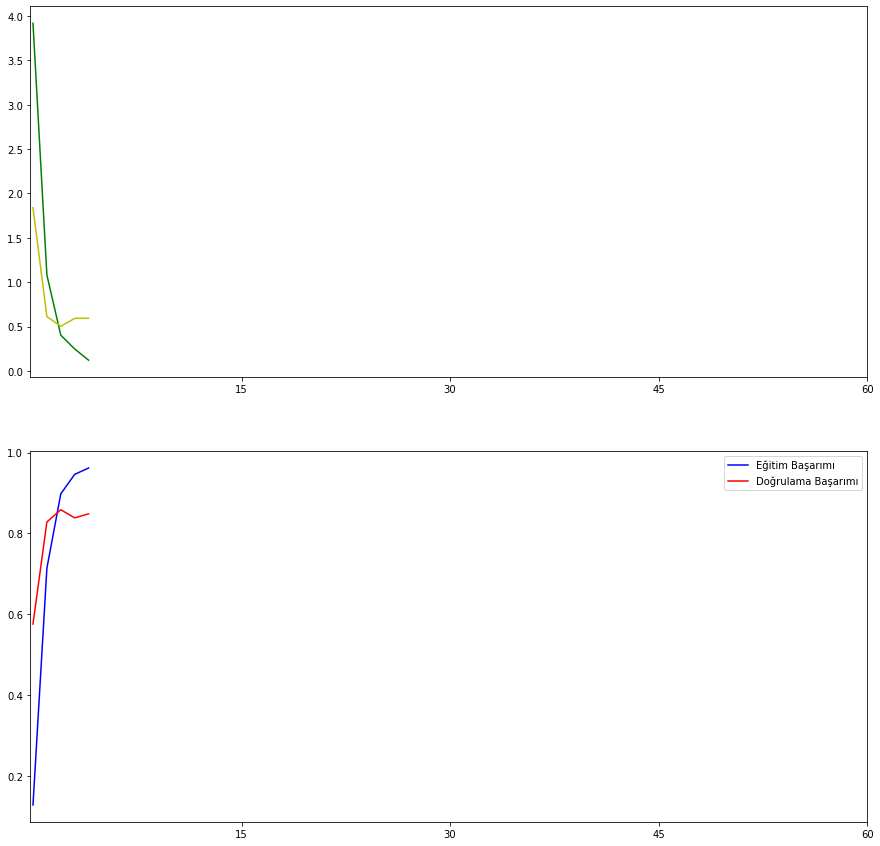

In [64]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
ax1.plot(model.history.history['loss'],color='g',label="Eğitim Kaybı")
ax1.plot(model.history.history['val_loss'],color='y',label="Doğrulama kaybı")
ax1.set_xticks(np.arange(15,75,15))
ax2.plot(model.history.history['accuracy'],color='b',label="Eğitim Başarımı")
ax2.plot(model.history.history['val_accuracy'],color='r',label="Doğrulama Başarımı")
ax2.set_xticks(np.arange(15,75,15))
plt.legend()
plt.show()

In [76]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score
import numpy as np

In [77]:
# create the range 1 to 25
rn = range(1,26)

In [78]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [79]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [80]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 18 19 20 21 22 23 24 25] [10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21 22 23 24 25]


In [81]:
def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

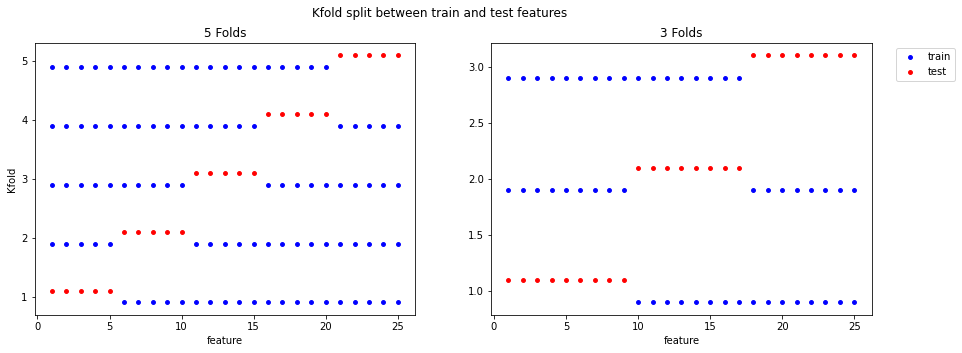

In [82]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [83]:
# let's make sure how the values are distributes between the sets; Also we will create function so that we can repeat
def kfold_stats(df, name):
    s =  pd.Series({"Min value: ": df["x"].min(),
              "Max value: ": df["x"].max(),
              "Min occurance: ": df["x"].value_counts().min(),
              "Max occurance: ": df["x"].value_counts().max(),
               "Min lenght": df.groupby("val").count().min().values[0],
               "Max lenght": df.groupby("val").count().max().values[0]})
    s.name = name
    return s
pd.concat([kfold_stats(train5, "Train5"), kfold_stats(test5,"Test5"),
          kfold_stats(train3, "Train3"), kfold_stats(test3,"Test3")], 
          axis=1)

,Train5,Test5,Train3,Test3
Min value:,1,1,1,1
Max value:,25,25,25,25
Min occurance:,4,1,2,1
Max occurance:,4,1,2,1
Min lenght,20,5,16,8
Max lenght,20,5,17,9
